___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MAIN

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

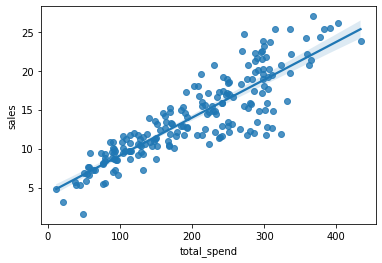

In [5]:
sns.regplot(data=df, x='total_spend', y='sales')

In [6]:
X = df['total_spend']
y = df['sales']

# y = mx + b = B1x + B0

In [7]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [13]:
potential_spend = np.linspace(0, 500, 100)
predicted_sales = (0.04868788 * potential_spend) + 4.24302822

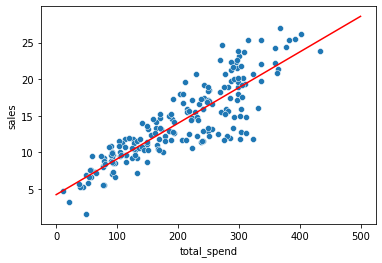

In [10]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')

In [19]:
spend = 200
predicted_sale = (0.04868788 * spend) + 4.24302822
predicted_sale

13.98060422

In [20]:
# y = B3 * x**3 + B2 * x**2 + B1 * x + B0
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

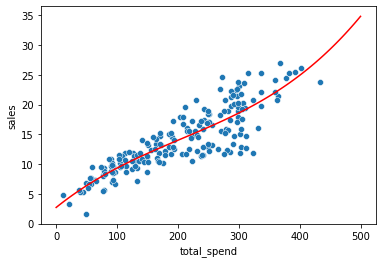

In [21]:
pot_spend = np.linspace(0, 500, 100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend, pred_sales, color='red')

# Introduction to Simple Linear Regression

In this very simple example, we'll explore how to create a very simple fit line, the classic case of y=mx+b. We'll go carefully through each step, so you can see what type of question a simple fit line can answer. Keep in mind, this case is very simplified and is not the approach we'll take later on, its just here to get you thinking about linear regression in perhaps the same way [Galton](https://en.wikipedia.org/wiki/Francis_Galton) did.

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [9]:
df = pd.read_csv("Advertising.csv")

In [10]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Is there a relationship between *total* advertising spend and *sales*?**

In [11]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

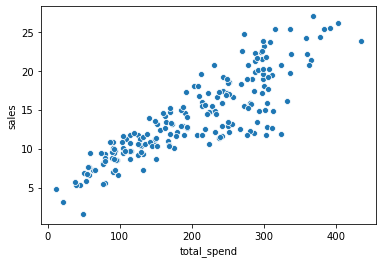

In [12]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Least Squares Line

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,as well as in ISLR reading.

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

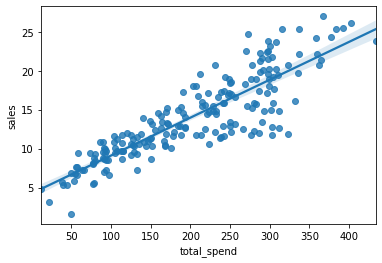

In [13]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) Y and a known matrix of total_spend (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use y hat to indicate that y hat is a prediction or estimation, y would be a true label/known value.

We can use NumPy for this (if you really wanted to, you could solve this by [hand](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [14]:
X = df['total_spend']
y = df['sales']

In [15]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [16]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [17]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [21]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

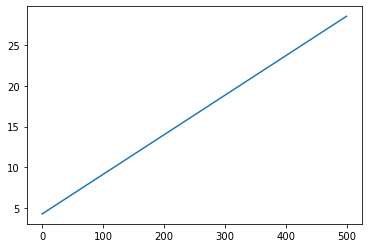

In [22]:
plt.plot(potential_spend,predicted_sales)

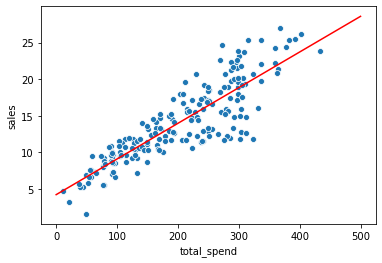

In [24]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [25]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [26]:
predicted_sales

13.98060422

# Further considerations...which we will explore in much more depth!

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [33]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [34]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [35]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

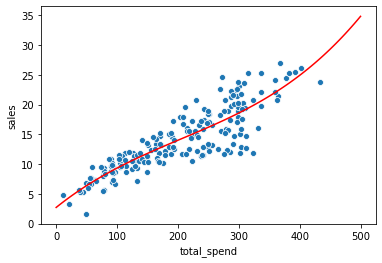

In [40]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Is this better than our straight line fit? What are good ways of measuring this?**

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

In [37]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [41]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Uh oh! Polyfit only works with a 1D X array! We'll need to move on to a more powerful library...**

-------
--------